# **데이터 분석 프로젝트**


## **1. '한국복지패널데이터' 분석 준비하기**

- 한국보건사회연구원 발간
- 가구의 경제활동을 연구해 정책 지원에 반영할 목적
- 2006~2015년까지 전국에서 7000여 가구를 선정해 매년 추적 조사
- 경제활동, 생활실태, 복지욕구 등 수천 개 변수에 대한 정보로 구성

### 1) 데이터 분석 준비하기

##### (1) 패키지 준비하기

In [ ]:
install.packages("foreign")   ## foreign 패키지 설치
library(foreign)              ## SPSS 파일 로드 패키지
library(dplyr)                ## 데이터 전처리
library(ggplot2)              ## 시각화
library(readxl)               ## 엑셀 파일 불러오기

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




##### (2) 데이터 준비하기

In [ ]:
# 데이터 불러오기
raw_welfare <- read.spss(file = "Koweps_hpc10_2015_beta1.sav",
                                to.data.frame = T)

ERROR: Error in read.spss(file = "Koweps_hpc10_2015_beta1.sav", to.data.frame = T): could not find function "read.spss"


In [ ]:
# 복사본 만들기
welfare <- raw_welfare

##### (3) 데이터 검토하기

In [ ]:
head(welfare)
tail (welfare)

,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,⋯,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,10101,0,NA,1,1,864,864,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,2,1,1,20101,0,NA,1,1,600,600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,3,1,1,30101,0,NA,1,1,1571,1619,⋯,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
5,4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,6,1,1,60101,0,NA,1,1,3030,3486,⋯,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,⋯,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16659,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,NA,7163,0,NA
16660,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16661,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,3630,NA,NA,0,NA
16662,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,700,NA,0,NA
16663,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16664,9800,7,1,98000701,1,NA,4,5,9764,11600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA


In [ ]:
View(welfare)

h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,⋯,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,10101,0,NA,1,1,864,864,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,1,1,20101,0,NA,1,1,600,600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,1,1,30101,0,NA,1,1,1571,1619,⋯,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,⋯,NA,NA,NA,NA,NA,NA,NA,3000,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,⋯,4,1,1,1,4,NA,NA,NA,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA


In [ ]:
dim(welfare)      ## 16664행 957열

[1] 16664   957

In [ ]:
str(welfare)

'data.frame':	16664 obs. of  957 variables:
 $ h10_id          : num  1 2 3 4 4 6 6 6 6 6 ...
 $ h10_ind         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_sn          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_merkey      : num  10101 20101 30101 40101 40101 ...
 $ h_new           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ h10_cobf        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ h10_reg5        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_reg7        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_din         : num  864 600 1571 3579 3579 ...
 $ h10_cin         : num  864 600 1619 3687 3687 ...
 $ h10_flag        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ p10_wgl         : num  777 960 1059 1012 1075 ...
 $ p10_wsl         : num  0.257 0.317 0.35 0.334 0.355 ...
 $ p10_wgc         : num  764 949 1048 992 1057 ...
 $ p10_wsc         : num  0.252 0.314 0.346 0.328 0.349 ...
 $ h10_hc          : num  2 2 1 1 1 1 1 1 1 1 ...
 $ nh1001_1        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ nh1001_2        : num  NA NA NA NA NA NA NA

In [ ]:
summary(welfare)      ## 각 열 마다 최대/최소/중앙값/평균/1,3분위 수를 요약해서 보여줌.

     h10_id        h10_ind           h10_sn        h10_merkey      
 Min.   :   1   Min.   : 1.000   Min.   :1.000   Min.   :   10101  
 1st Qu.:2361   1st Qu.: 1.000   1st Qu.:1.000   1st Qu.:23612601  
 Median :4503   Median : 1.000   Median :1.000   Median :45030401  
 Mean   :4669   Mean   : 2.612   Mean   :1.003   Mean   :46689252  
 3rd Qu.:6613   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:66130501  
 Max.   :9800   Max.   :10.000   Max.   :9.000   Max.   :98000701  
                                                                   
     h_new           h10_cobf        h10_reg5        h10_reg7    
 Min.   :0.0000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :0.0000   Median :1.000   Median :3.000   Median :3.000  
 Mean   :0.2009   Mean   :2.213   Mean   :2.641   Mean   :3.705  
 3rd Qu.:0.0000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:6.000  
 Max.   :1.0000   Max.   :7.000   Max.   :5.000   Max.   :7.

**<문제점>**

- 변수가 많고, 변수명이 코드로 되어 있어 데이터 구조 파악이 어려움.

- 변수명을 알아보기 쉬운 단어로 바꾸고 분석에 사용할 변수 파악할 필요 O.

##### (4) 변수명 바꾸기

In [ ]:
welfare <- rename(welfare,
                  sex = "h10_g3",           # 성별
                  birth = "h10_g4",         # 태어난 연도
                  marriage = "h10_g10",     # 혼인 상태
                  religion = "h10_g11",     # 종교
                  income = "p1002_8aq1",    # 월급
                  code_job = "h10_eco9",    # 직종 코드
                  code_region = "h10_reg7") # 지역 코드

### 2) 데이터 분석 절차



---


**[1단계] 문제 정의**
- 분석하고자 하는 분야를 이해하고, 해결해야 할 문제를 객관적이고 구체적으로 정의

**[2단계] 변수 검토 및 전처리**
- 변수의 특성을 파악, 이상치 정제, 파생변수 생성

**[3단계] 데이터 분석(모델링)**
- 변수 간 관계를 분석하고, 하나의 테이블 혹은 다수의 테이블을 이용하여 분석
- 탐색적 데이터 분석(EDA) or 머신러닝, 딥러닝


**[4단계] 시각화**
- 다양한 도구를 이용해 데이터 시각화, 탐색을 통해 분제 해결

**[5단계] 문제해결 및 인사이트 도출**
- 초기 정의한 문제 해결, 데이터 분석을 통한 결론/인사이트 도출


---



## **2. 성별에 따른 월급 차이**

**[1단계] 문제 정의**
- 과거에 비해 여성의 사회 진출이 활발해졌지만, 현실적으로 직장에서 받는 대우에는 차별이 존재한다고 가정.
-데이터 분석을 통해 성별에 따른 월급 차이가 있는지 확인

**[2단계] 변수 검토 및 전처리**

### 1) 성별 변수 검토 및 전처리


##### (1) 변수 검토하기

In [ ]:
class(welfare$sex)

[1] "numeric"

In [ ]:
table(welfare$sex)


   1    2 
7578 9086 

##### (2) 전처리

In [ ]:
# 이상치 확인
table(welfare$sex)


   1    2 
7578 9086 

In [ ]:
# 이상치 결측 처리
welfare$sex <- ifelse(welfare$sex == 9, NA, welfare$sex)

In [ ]:
# 결측치 확인
table(is.na(welfare$sex))     ## FALSE -> 결측치 없음.


FALSE 
16664 

In [ ]:
# 성별 항목 이름 부여
welfare$sex <- ifelse(welfare$sex == 1, "male", "female")
table(welfare$sex)


female   male 
  9086   7578 

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


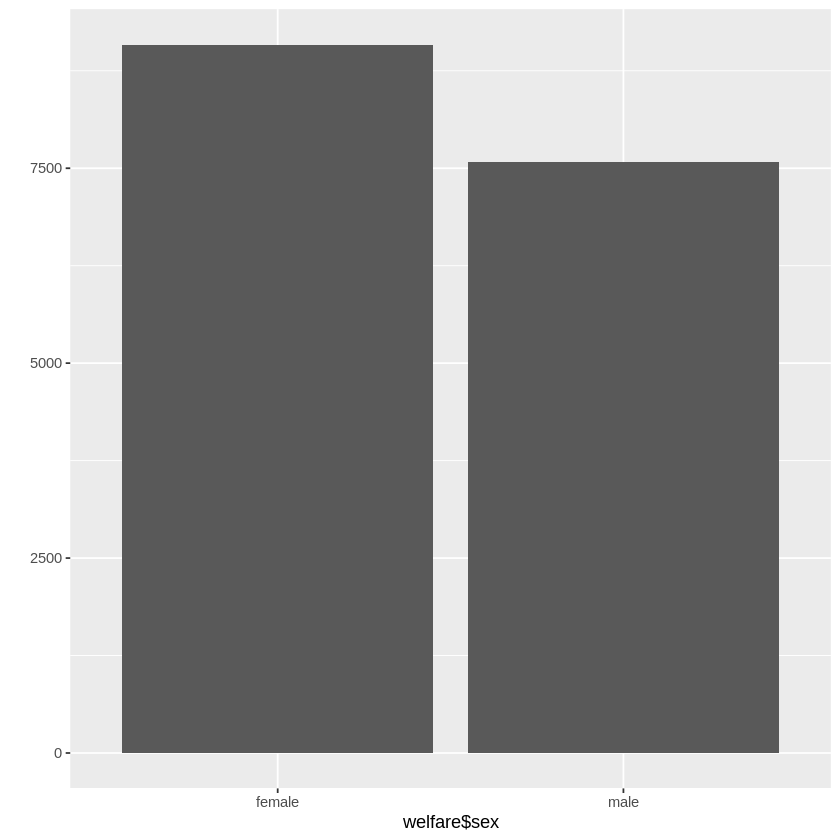

In [ ]:
qplot(welfare$sex)

### 2) 월급 변수 검토 및 전처리

##### (1) 변수 검토

In [ ]:
class(welfare$income)

[1] "numeric"

In [ ]:
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 12030 rows containing non-finite values (`stat_bin()`).”


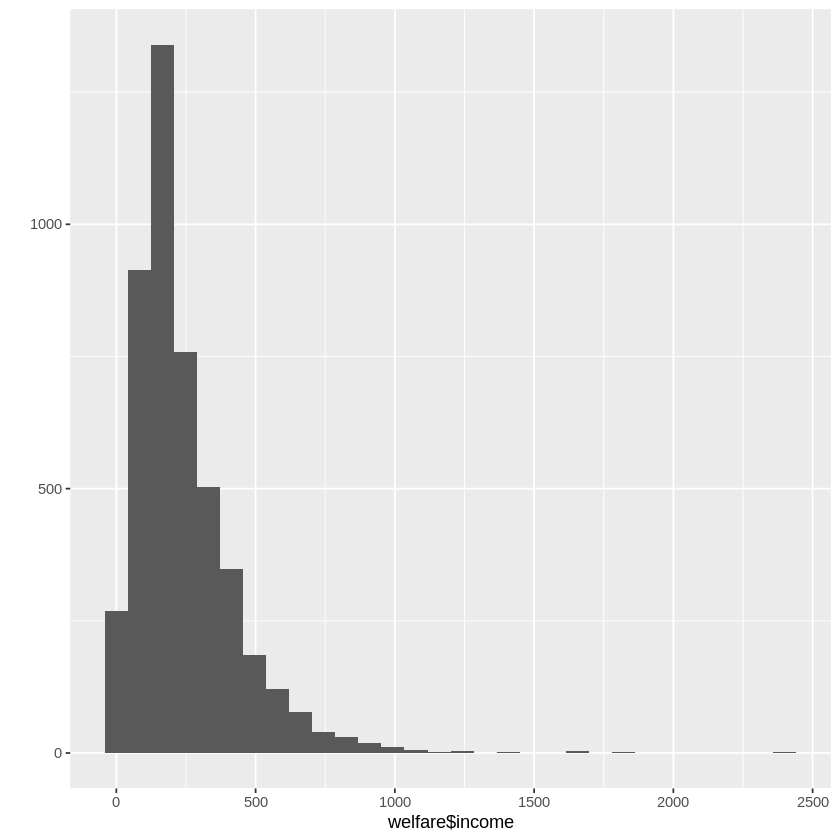

In [ ]:
qplot(welfare$income)

*   'income'은 'numeric' 타입
*   '122 ~ 316만원' 사이에 가장 많이 분포하고 있다.



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 12051 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


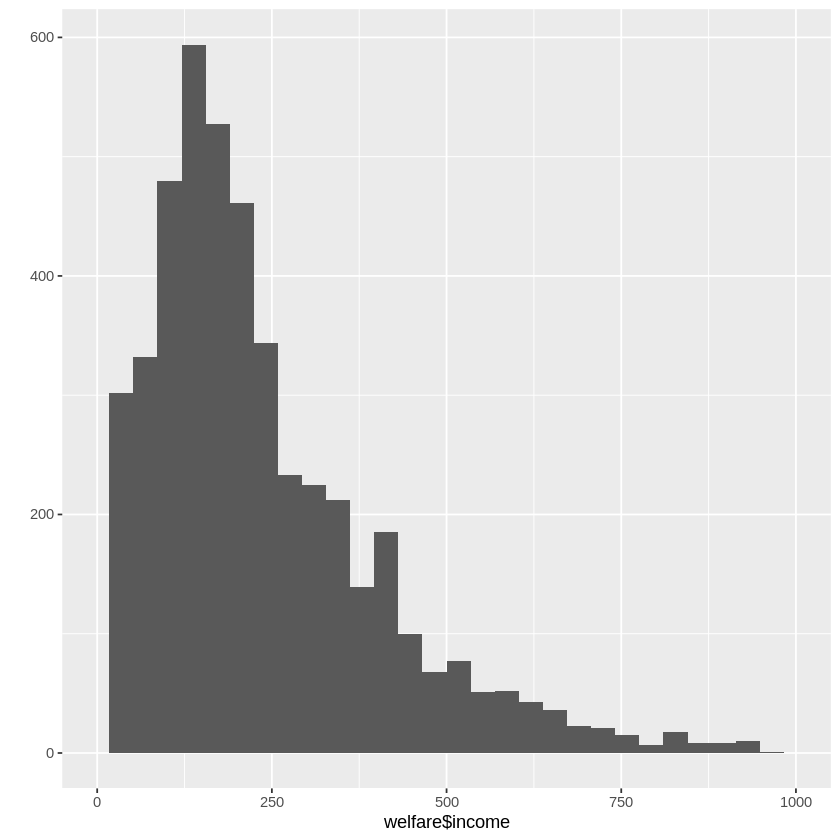

In [ ]:
qplot(welfare$income) + xlim(0, 1000)   ## x축의 범위를 '0 ~ 1000'까지로 제한

##### (2) 전처리

In [ ]:
# 이상치 확인
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

In [ ]:
# 이상치 결측 처리
welfare$income <- ifelse(welfare$income %in% c(0, 9999), NA, welfare$income)

In [ ]:
# 결측치 확인
table(is.na(welfare$income))


FALSE  TRUE 
 4620 12044 

### 3) 성별에 따른 월급 차이 분석하기

##### (1) 성별 월급 평균표 만들기

In [ ]:
sex_income <- welfare %>%
  filter(!is.na(income)) %>%
  group_by(sex) %>%
  summarise(mean_income = mean(income))

sex_income

sex,mean_income
<chr>,<dbl>
female,163.2471
male,312.2932


##### (2) 그래프 만들기

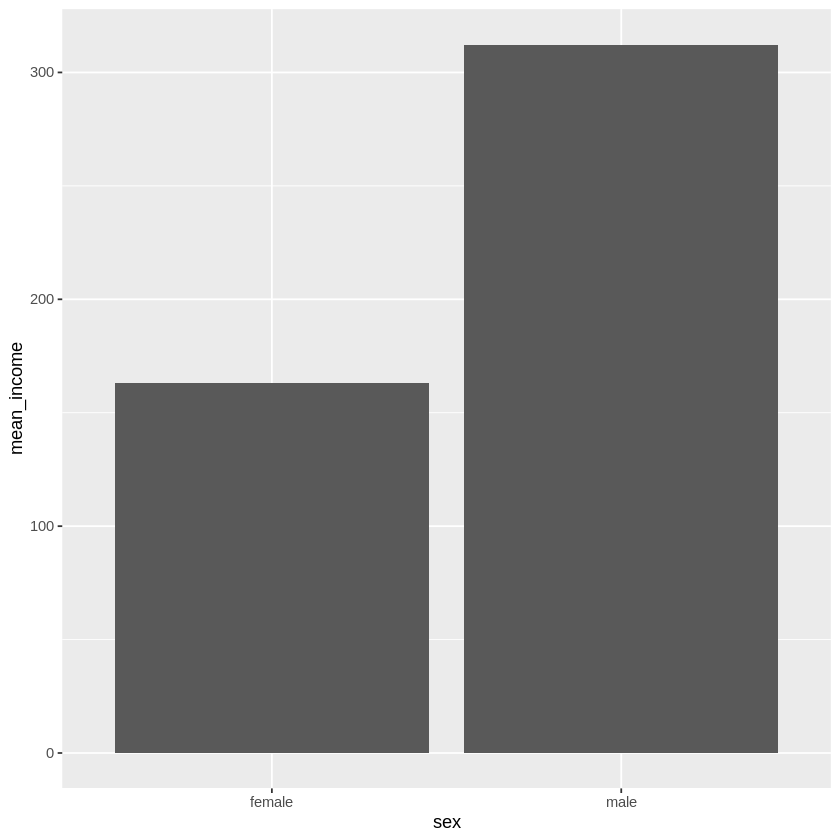

In [ ]:
ggplot(data = sex_income, aes(x = sex, y = mean_income)) + geom_col()

## **3. 나이와 월급의 관계**

**[1단계] 문제 정의**


*   사회초년생의 월급은 적고, 일정 나이 이상으로 올라가면 실직과 정년퇴임 등의 사유로 인해 월급 수준이 감소할 것으로 가정하였다.
*   실제 나이에 따른 월급 평균의 변화와, 전체 데이터에서 평균 월급의 최소값이 어느 나이에 위치하고 있는지를 확인한다.




### 1) 변수 검토 및 전처리

##### (1) 변수 검토

In [ ]:
class(welfare$birth)

[1] "numeric"

In [ ]:
summary(welfare$birth)      ## 생년으로 기록되어 있음.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


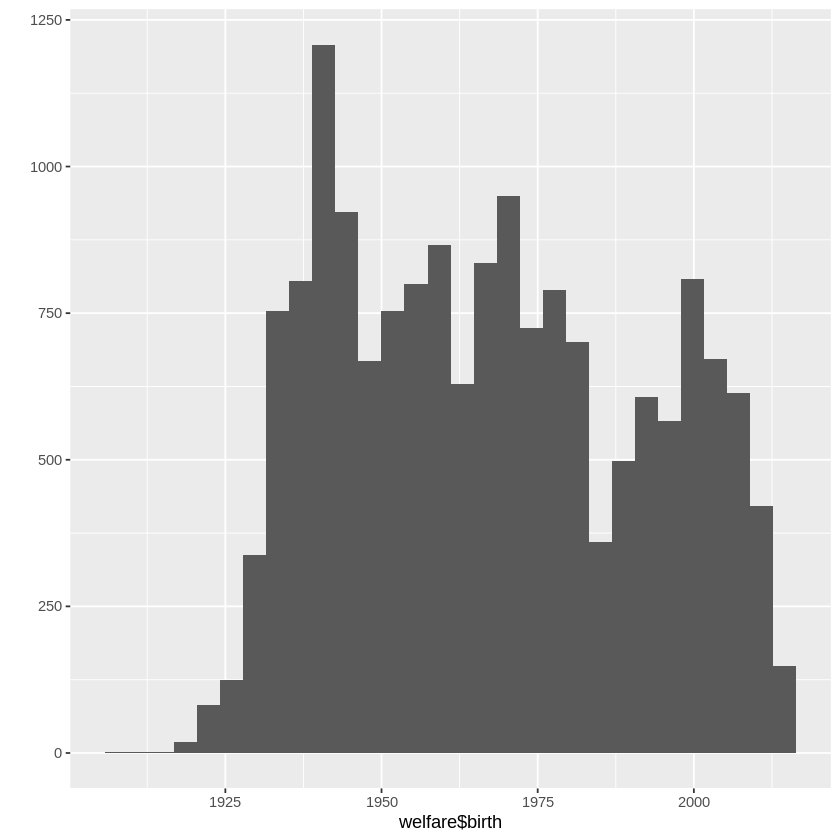

In [ ]:
qplot(welfare$birth)

##### (2) 전처리

In [ ]:
# 결측치 확인
dim(welfare)                    ## 전체 행의 개수 확인
table(is.na(welfare$birth))     ## FALSE인 행의 개수가 전체 행과 일치 -> 결측치 없음.

[1] 16664   957


FALSE 
16664 



*   결측치는 없음.
*   결측치 처리는 되어 있지 않으나, 이상치인 행이 있을 수 있으므로 결측치 처리 과정이 필요함.



In [ ]:
# 이상치 결측 처리
welfare$birth <- ifelse(welfare$birth == 9999, NA, welfare$birth)
table(is.na(welfare$birth))


FALSE 
16664 



*   이상치가 결측치로 처리된 행 없음.



##### (3) 파생변수 만들기

In [ ]:
welfare$age <- 2015 - welfare$birth + 1
summary(welfare$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   28.00   50.00   48.43   70.00  109.00 



*   해당 데이터가 2015년까지의 데이터이므로 2015년생을 1살로 설정했다.
*   최신 연도인 2015년에서 출생연도를 제하고 1을  더하여 나이 변수로 만들었다.



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


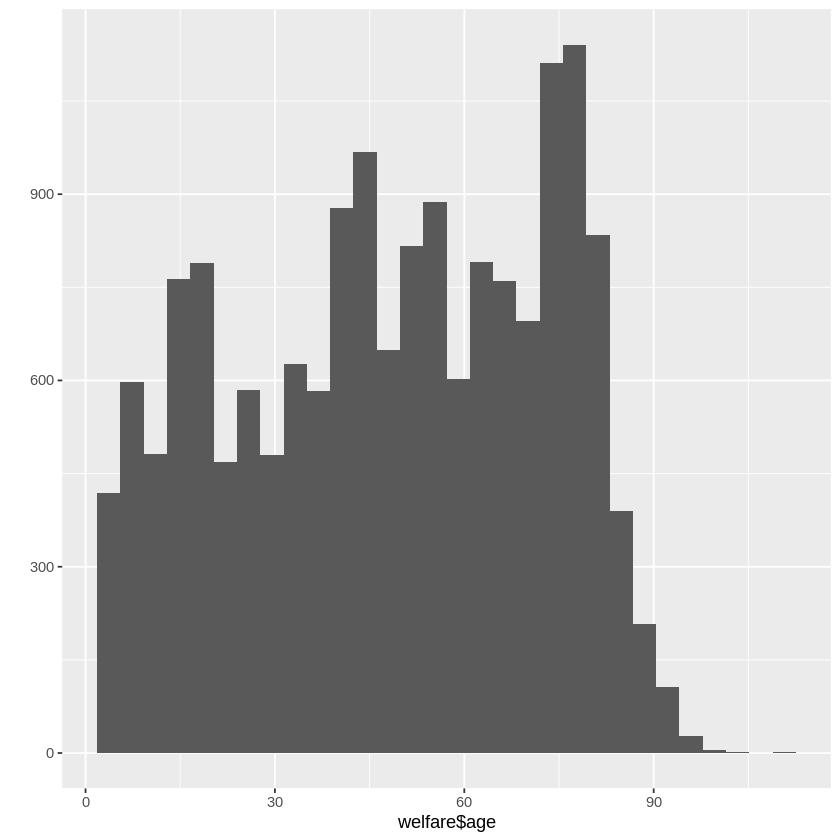

In [ ]:
qplot(welfare$age)

### 2) 나이와 월급의 관계 분석

##### (1) 나이에 따른 월급 평균표 만들기

In [ ]:
age_income <- welfare %>%
  filter(!is.na(income)) %>%
  group_by(age) %>%
  summarise(mean_income = mean(income))

head(age_income)
summary(age_income)

age,mean_income
<dbl>,<dbl>
20,121.3000
21,105.5185
22,130.0923
23,141.7157
24,134.0877
25,144.6559


      age         mean_income    
 Min.   :20.00   Min.   : 15.00  
 1st Qu.:37.00   1st Qu.: 98.05  
 Median :54.00   Median :188.25  
 Mean   :54.04   Mean   :177.25  
 3rd Qu.:71.00   3rd Qu.:284.87  
 Max.   :89.00   Max.   :318.68  



*   나이 데이터의 최소값은 20세, 최대값은 89세이다. 성인 연령인 20세 부터의 데이터가 있는 것을 알 수 있다.
*   월급 데이터의 최소값은 15만원, 최대값은 약 318만원이다.



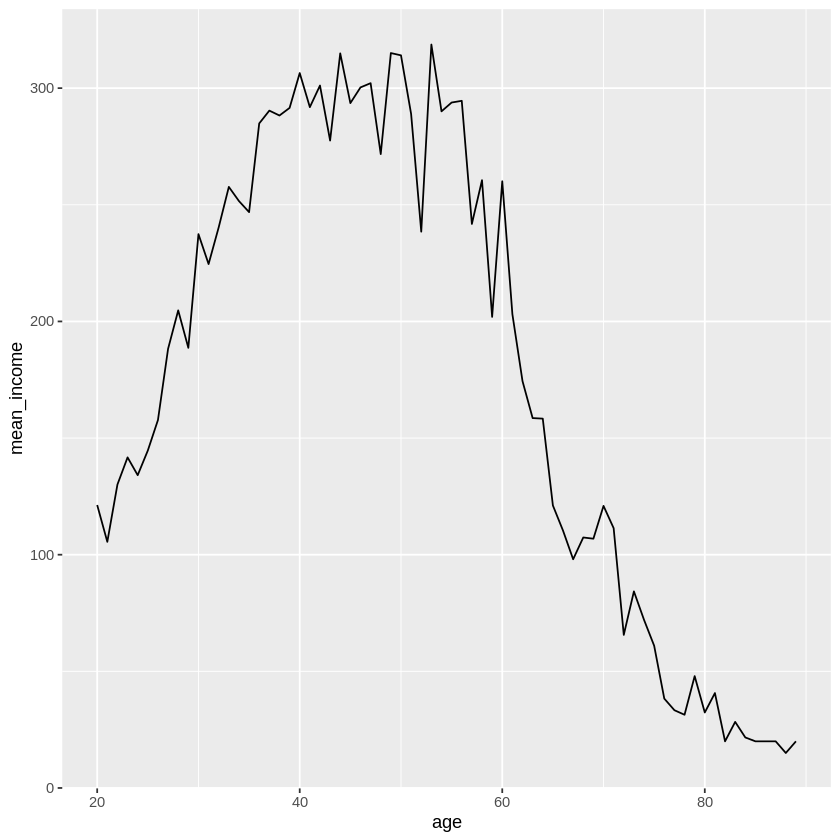

In [ ]:
ggplot(data = age_income, aes(x = age, y = mean_income)) + geom_line()



*   'age'를 x축으로, 나이에 따른 월급 평균인 'mean_income'을 y축으로 하여 그래프를 생성하였다.
*   그래프 추이를 볼 때, '20세 ~ 50세 전후'로는 월급이 우상향 그래프를 그리며 대체적으로 상승하는 것을 볼 수 있다. 그 이후로는 하강세를 보이다, '60세 이후'로 월급 평균이 유의미하게 감소한다.
*   이는 대한민국 현행 법정 정년 나이인 60세를 기점으로 퇴임하는 인구수가 많아져 실질적으로 평균 수치가 떨어지는 것으로 볼 수 있다.



## **4. 연령대에 따른 월급 차이**

**[1단계] 문제 정의**
- 경력이 낮은 초년층의 월급은 중년층에 비해 적고, 경력이 있는 중년층의 월급은 가장 높으며, 은퇴의 이유로 노년층은 월급이 가장 낮다고 가정.
-데이터 분석을 통해 연령대에 따른 월급 차이가 있는지 확인

**[2단계] 변수 검토 및 전처리**

### 1) 연령대 변수 검토, 전처리

(1) 변수 검토

In [ ]:
welfare <- welfare %>%
  mutate(ageg = ifelse(age < 30, "young",
                        ifelse(age <= 59, "middle", "old")))
table(welfare$ageg)


middle    old  young 
  6049   6281   4334 



*   30세 이하: young
*   31세~59세: middle
*   60세 이상: old



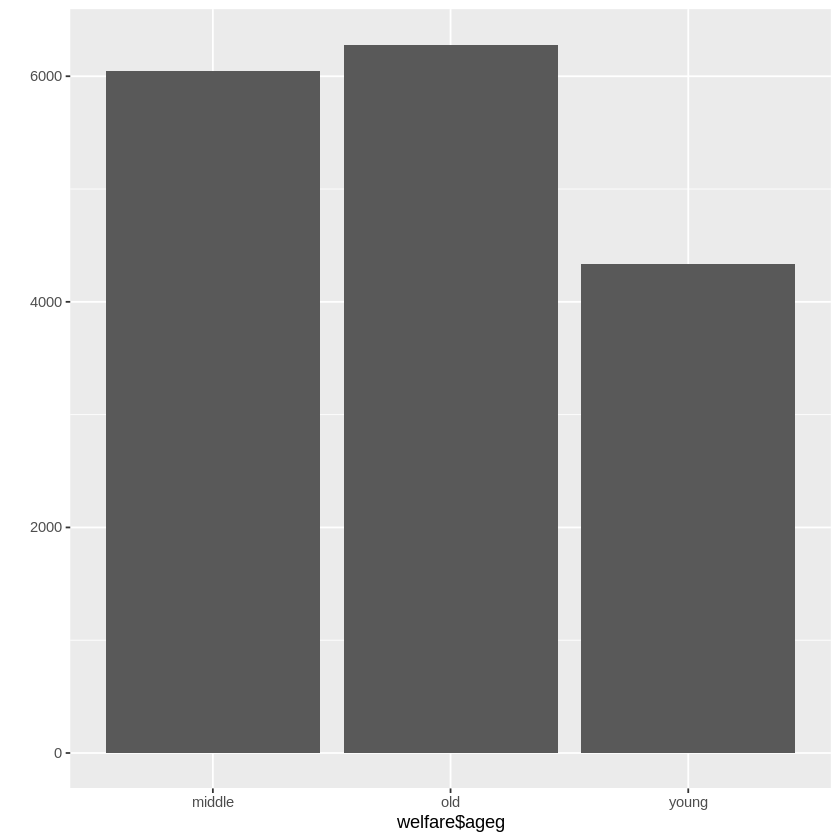

In [ ]:
qplot(welfare$ageg)

**[3단계] 데이터 분석**

### 2) 연령대에 따른 월급 차이 분석

##### (1) 연령대별 월급 평균표

In [ ]:
ageg_income <- welfare %>%
  filter(!is.na(income)) %>%
  group_by(ageg) %>%
  summarise(mean_income = mean(income))

ageg_income

ageg,mean_income
<chr>,<dbl>
middle,281.8871
old,125.3295
young,163.5953


##### (2) 그래프 만들기

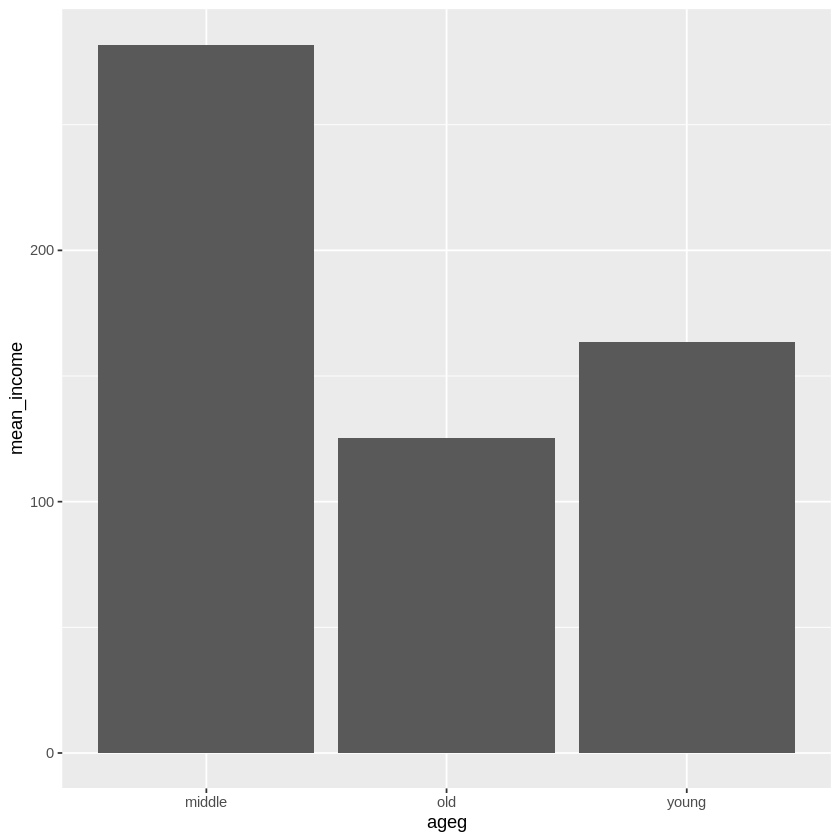

In [ ]:
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) + geom_col()

**[4단계] 시각화**

##### (3) 막대 정렬: young-middle-old 순서

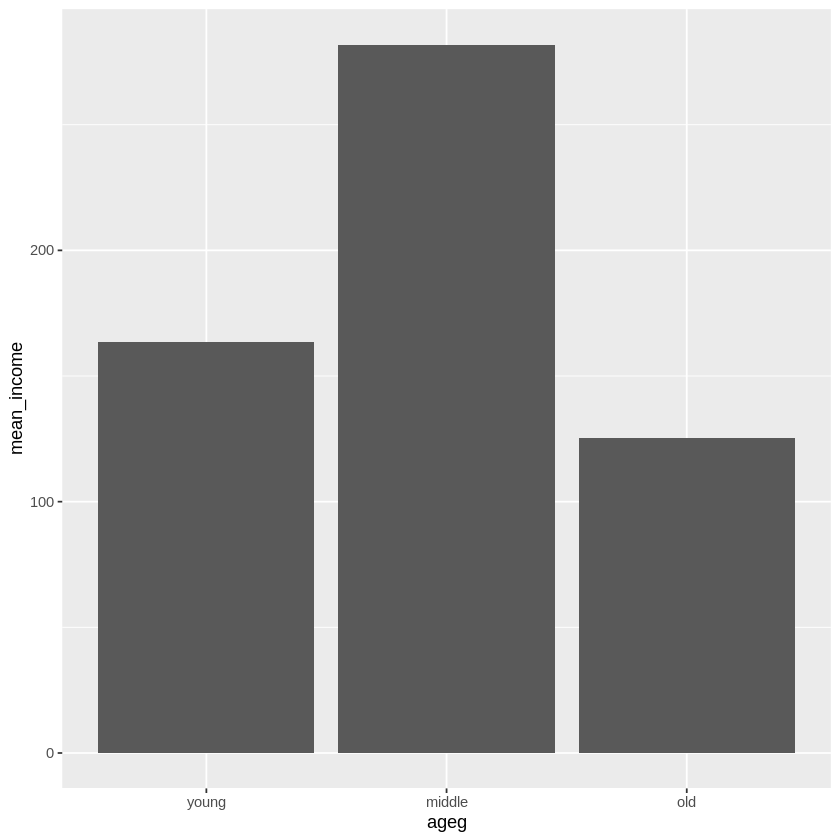

In [ ]:
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) +
  geom_col() +
  scale_x_discrete(limits = c("young", "middle", "old"))

**[5단계] 결론**

- 'ageg'를 x축으로, 'mean_income'을 y축으로 하여 그래프를 생성하였다.
- 그래프의 추이로 볼 때, 중년층의 월급이 250만원 이상으로 가장 높으며, 노년층은 150만원 이하로 가장 낮다. 더해서 초년층은 150만원 이상으로 중간에 위치한다.
- **사회에 진출한 경력이 높은 중년층의 월급이 가장 높고, 사회초년생인 초년층의 월급은 그보다 낮으며, 은퇴한 노년층의 월급이 가장 낮게 나타난다고 볼 수 있다.**

## **5. 연령대 및 성별 월급 차이**

**[1단계] 문제 정의**
- 앞서 확인된 성별, 세대별 임금격차에 기반하여 평균임금이 상대적으로 낮은 초년층, 노년층의 성별 임금격차는 적고 중년층의 성별 임금격차는 높을 것으로 가정한다.
- 각각 초년, 중년, 노년 세대의 성별에 따른 임금격차를 확인한다.

**[2단계] 변수 검토 및 전처리**


### 1) 연령대 및 성별 월급 차이 분석하기

(1) 연령대 및 성별 월급 평균표 만들기

In [ ]:
sex_income <- welfare %>%
  filter(!is.na(income)) %>%
  group_by(ageg, sex) %>%
  summarise(mean_income = mean(income))

sex_income

`summarise()` has grouped output by 'ageg'. You can override using the
`.groups` argument.


ageg,sex,mean_income
<chr>,<chr>,<dbl>
middle,female,187.97552
middle,male,353.07574
old,female,81.52917
old,male,173.85558
young,female,159.50518
young,male,170.81737


(2) 그래프 만들기

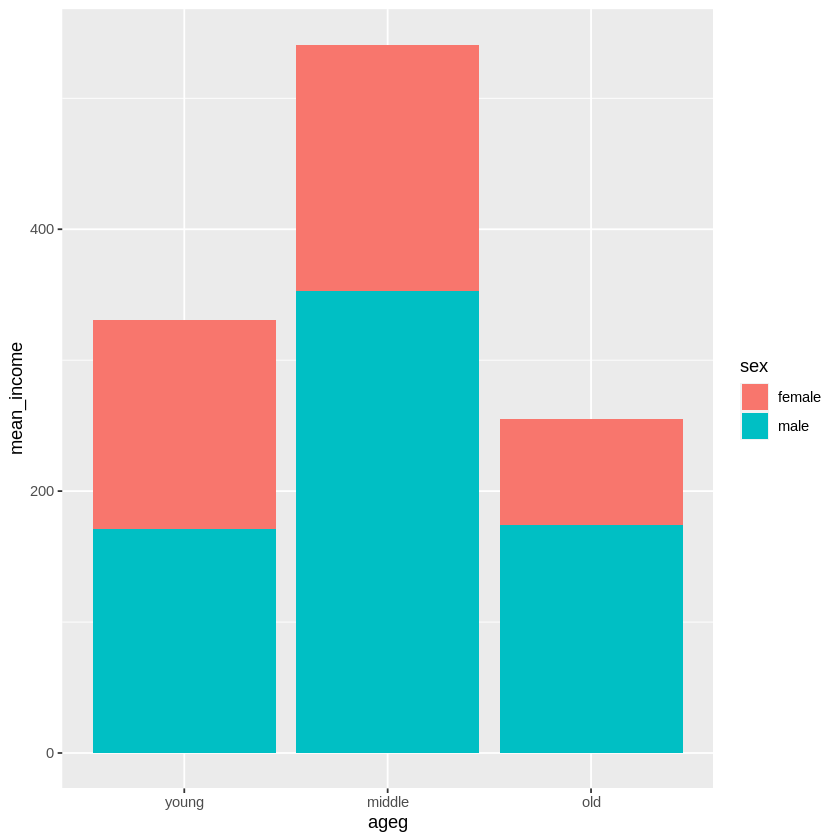

In [ ]:
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) + geom_col() + scale_x_discrete(limits = c("young", "middle", "old"))

(3) 성별 막대 분리

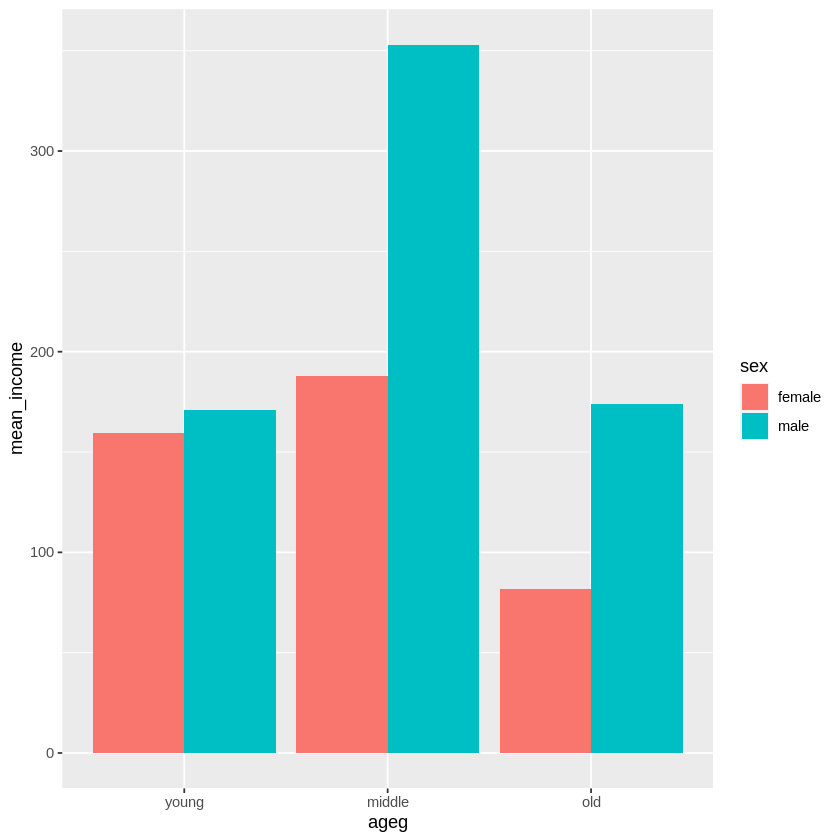

In [ ]:
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) + geom_col(position = "dodge") + scale_x_discrete(limits = c("young", "middle", "old"))

**[3단계] 데이터 분석**

### 2) 나이 및 성별 월급 차이 분석하기

(1) 성별 연령별 월급 평균표 만들기

In [ ]:
sex_age <- welfare %>%
  filter(!is.na(income)) %>%
  group_by(age,sex) %>%
  summarise(mean_income = mean(income))

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


In [ ]:
head(sex_age)

age,sex,mean_income
<dbl>,<chr>,<dbl>
20,female,147.4500
20,male,69.0000
21,female,106.9789
21,male,102.0500
22,female,139.8547
22,male,118.2379


**[4단계] 시각화**

(2) 그래프 만들기

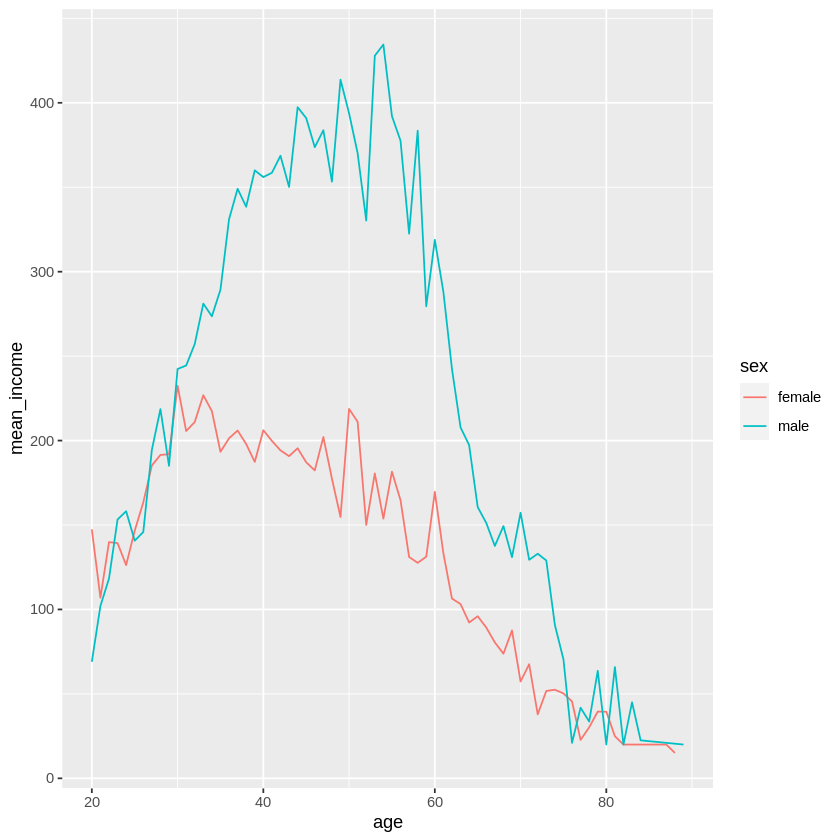

In [ ]:
ggplot(data = sex_age, aes(x = age, y = mean_income, col = sex)) + geom_line()

**[5단계] 결론**

- 'age'는 x축으로, 'mean_income'을 y축으로 하여 그래프를 생성하였다.
- 그래프의 추이를 볼 때, '20대'는 성별 월급의 차이가 거의 없음을 알 수 있다. 반면 '30대 ~60대'는 성별 월급의 차이가 높고, '50대'에는 2배이상 차이가 존재한다. '60대 이후'에는 서서히 차이가 좁혀지면서, 80대에 비슷해짐을 볼 수 있다.
- 여성의 급여는 20대 부터 60대 까지 비슷한 정도를 유지하고, 남성의 급여는 20대부터 50대까지 우상향하며 60대부터 점점 하향한다. 여성, 남성 모두 80대에는 월급이 비슷하게 매우 낮아진다.
- **30대에서 70대까지 여성과 남성의 급여차이가 존재하며, 50대에 가장 크다. 또한 여성의 급여는 나이에 따른 상승폭이 완만하며, 남성의 급여는 나이가 많아짐에 따라 우상향함을 알 수 있다.**

## **6. 직업별 월급 차이**

**[1단계] 문제 정의**
-  직군에 따른 월급의 편차 수준을 알아본다.
-  사회적으로 '고학력 직업'으로 인식되는 직업과 그렇지 않은 직업의 월급 차이를 살펴본다.
-  월급의 차이가 경제적인 불평등을 야기하는 원인이 되는지 여부를 판단한다.

**[2단계] 변수 검토 및 전처리**

(1) 변수 검토하기

In [ ]:
class(welfare$code_job)
table(welfare$code_job)

ERROR: Error in eval(expr, envir, enclos): object 'welfare' not found


(2) 전처리

In [ ]:
# 직업분류코드 목록 불러오기
library(readxl)
list_job <- read.csv("Koweps_Codebook_2019.csv")
head(list_job)
dim(list_job)

# welfare에 직업명 결합
welfare <- left_join(welfare, list_job, by = "code_job")

welfare %>%
  filter(!is.na(code_job)) %>%
  select(code_job, job) %>%
  head(10)

**[3단계] 데이터 분석**

(1) 직업별 월급 평균표 만들기

In [ ]:
job_income <- welfare %>%
  filter(!is.na(job) & !is.na(income)) %>%
  group_by(job) %>%
  summarise(mean_income = mean(income))

head(job_income)

(2) 상위 10개 추출

In [ ]:
top10 <- job_income %>%
  arrange(desc(mean_income)) %>%
  head(10)

ERROR: Error in job_income %>% arrange(desc(mean_income)) %>% head(10): could not find function "%>%"


**[4단계] 시각화**

In [ ]:
ggplot(data = top10, aes(x = reorder(job, mean_income), y = mean_income)) +
  geom_col() +
  coord_flip()
    # 하위 10위 추출
bottom10 <- job_income %>%
  arrange(mean_income) %>%
  head(10)

bottom10

ggplot(data = bottom10, aes(x = reorder(job, -mean_income),
                            y = mean_income)) +
  geom_col() +
  coord_flip() +
  ylim(0, 850)

**[5단계] 결론**

- 월급 수준이 가장 높은 직업은 약 850만원, 가장 낮은 직업은 약 110만원으로 직업에 따른 월급 편차가 매우 큰 것을 알 수 있다.
- 월급 수준 상위 10위의 직업들은 대체로 전문 지식과 기술을 필요로 하는 직업이며 경영, 경제 관련 직업과 정계 직업, 공학 관련 직업이 주를 이루고 있다.
- 반면 월급 수준 하위 10위의 직업들은 필수 노동직 및 서비스직이 주를 이루고 있다.
- 같은 의학계 내에서도 직업에 따른 차이를 볼 수 있다. 의료 진료 전문가의 경우에는 전체에서 월급 수준의 상위 2위를 차지한 직업인 반면, 약사 및 한약사는 하위 6위를 차지한 직업으로 같은 업계 내에서도 큰 편차가 있음을 확인할 수 있다.


## **7. 성별 직업 빈도**

**[1단계] 문제 정의**
- 성별에 따른 선호 직업이 있는지 여부를 알아본다.
- 성별 고정관념이 직업 선택에 영향을 미치는지 확인한다.

**[2단계] 변수 검토 및 전처리**
- 앞선 데이터 분석 과정에서 전처리가 되어 있으므로 해당 단계에서는 생략한다.

**[3단계] 데이터 분석**

(1) 성별 직업 빈도표 만들기

In [ ]:
# 남성 직업 빈도 상위 10개 추출
job_male <- welfare %>%
  filter(!is.na(job) & sex == "male") %>%
  group_by(job) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  head(10)

job_male

# 여성 직업 빈도 상위 10개 추출
job_female <- welfare %>%
  filter(!is.na(job) & sex == "female") %>%
  group_by(job) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  head(10)

**[4단계] 시각화**

In [ ]:
# 남성 직업 빈도 상위 10개 직업 시각화
ggplot(data = job_male, aes(x = reorder(job, n), y = n)) +
  geom_col() +
  coord_flip()

# 여성 직업 빈도 상위 10개 직업 시각화
ggplot(data = job_female, aes(x = reorder(job,n), y = n)) +
  geom_col() +
  coord_flip()

**[5단계] 결론**

- 남성 직업 빈도와 여성 직업 빈도 그래프에 따르면, 1위는 '작물 재배 종사자'로 동일한 것을 알 수 있다.
- 성별에 따른 차이는 2위 직업부터 볼 수 있는데, 상위 10위에는 겹치는 직업도 있었기 때문에 그렇지 않은 직업들을 보는 것이 차이를 보기에 적합하다고 판단하였다.
- 두 상위 10위까지의 직업 중 남성의 데이터에서만 나타나는 직업은 '자동차 운전원', '경영 관련 사무원', '영업 종사자', '건설 및 광업 단순 종사자', '건물 관리원 및 검표원', '행정 사무원'이 있다.
- 대체적으로 사무직 직업이나 일정 수준 이상의 육체적 노동력을 필요로 하는 직업이 주를 이루고 있는 것을 알 수 있다.
- 여성의 빈도수 상위 10위까지의 데이터에서만 나타나는 직업은 '회계 및 경리 사무원', '식음료 서비스 종사자', '조리사', '가사 및 육아 도우미', '돌봄 및 보건 서비스 종사자', '음식 관련 단순 종사자'가 있다.
- 일반 사무직 직업도 있으나, 남성 데이터와는 달리 주로 요리 혹은 돌봄과 관련된 직업이 해당하는 것을 볼 수 있다.
- 또한, 남성과 여성 데이터에서 공통적으로 집계된 '청소원 및 환경미화원'이 그래프 내에서 차지하는 순위 또한 상징적이다. 남성 데이터에서는 해당 직업이 7위를 차지하여 약 100명 가량의 수치가 집계된 반면, 여성 데이터에서는 약 200명으로 전체 2위를 차지하며 남성의 2배 가량이 해당 직업에 종사하고 있음을 알 수 있다.
- 이를 종합해 볼 때, 과거 남성과 여성에게 주어진 성 역할 고정관념이 현대에서도 직업적 측면에서 일정 부분 잔존하는 것을 알 수 있다.
- 또한, 상위 10위 중에서도 남성 데이터는 사무직이 주로 상위권을 차지했고, 여성 데이터에서는 필수 노동직 및 자영업 위주의 직업이 상위권을 차지하는 점에서 두 성별 간 직업 선택의 차이가 존재하는 것을 볼 수 있다.

## **8. 종교 유무에 따른 이혼율**
**[1단계] 문제 정의**
* 종교가 있고 없음에 따라 이혼율이 다른지에 대해 분석해보고자 했다.
* 종교인의 이혼율은 종교가 있는데 결혼한 사람들 중 이혼한 사람으로 정의했고, 무교인의 이혼율은 종교가  없는데 결혼한 사람들 중 이혼한 사람으로 정의했다.
* 이후, 종교인의 이혼율과 무교인의 이혼율을 그래프를 통해 시각적으로 비교했다.

### 1) 종교 변수 검토 및 전처리하기
#### (1) 변수 검토하기

In [ ]:
class(welfare$religion)

[1] "numeric"

In [ ]:
table(welfare$religion)


   1    2 
8047 8617 

#### (2) 전처리
* 종교 유무 이름 부여

In [ ]:
welfare$religion <- ifelse(welfare$religion == 1, "yes", "no")
table(welfare$religion)


  no  yes 
8617 8047 

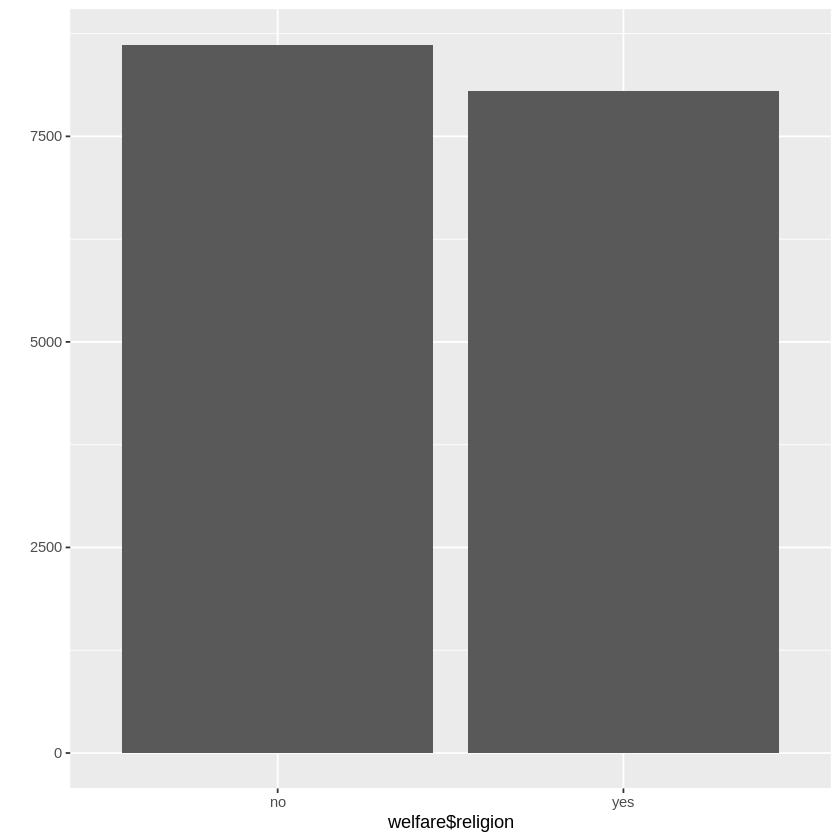

In [ ]:
qplot(welfare$religion)

### 2) 혼인 상태 변수 검토 및 전처리하기
#### (1) 변수 검토

In [ ]:
class(welfare$marriage)

[1] "numeric"

In [ ]:
table(welfare$marriage)



   0    1    2    3    4    5    6 
2861 8431 2117  712   84 2433   26 

#### (2) 전처리
* 이혼 여부 변수 만들기

In [ ]:
welfare$group_marriage <- ifelse(welfare$marriage == 1, "marriage", ifelse(welfare$marriage == 3, "divorce", NA))

In [ ]:
table(welfare$group_marriage)


 divorce marriage 
     712     8431 

In [ ]:
table(is.na(welfare$group_marriage))


FALSE  TRUE 
 9143  7521 

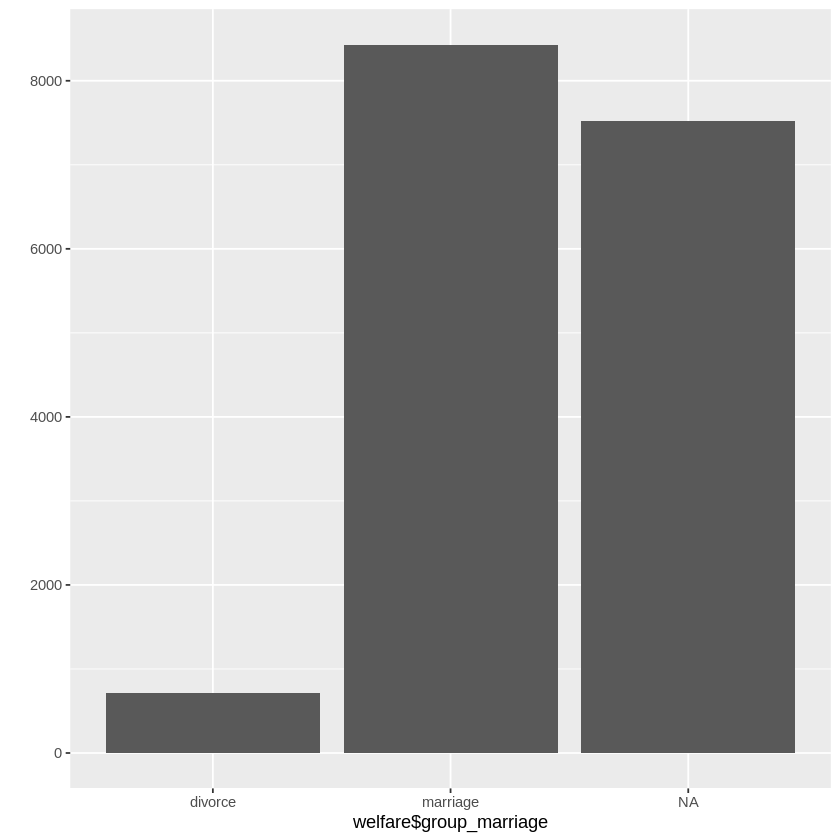

In [ ]:
qplot(welfare$group_marriage)

### 3) 종교 유무에 따른 이혼율 분석하기
#### (1) 종교 유무에 따른 이혼율 표 만들기

In [ ]:
religion_marriage <- welfare %>% filter(!is.na(group_marriage)) %>% group_by(religion, group_marriage) %>% summarise(n = n()) %>% mutate(tot_group = sum(n),
pct = round(n/tot_group*100, 1))

`summarise()` has grouped output by 'religion'. You can override using the
`.groups` argument.


In [ ]:
religion_marriage

religion,group_marriage,n,tot_group,pct
<chr>,<chr>,<int>,<int>,<dbl>
no,divorce,384,4602,8.3
no,marriage,4218,4602,91.7
yes,divorce,328,4541,7.2
yes,marriage,4213,4541,92.8


* count() 활용

In [ ]:
religion_marriage <- welfare %>% filter(!is.na(group_marriage)) %>% count(religion, group_marriage) %>% group_by(religion) %>%
mutate(pct = round(n/sum(n)*100, 1))

#### (2) 이혼율 표 만들기
* 이혼 추출

In [ ]:
divorce <- religion_marriage %>% filter(group_marriage == "divorce") %>% select(religion, pct)

In [ ]:
divorce

religion,pct
<chr>,<dbl>
no,8.3
yes,7.2


#### (3) 그래프 만들기

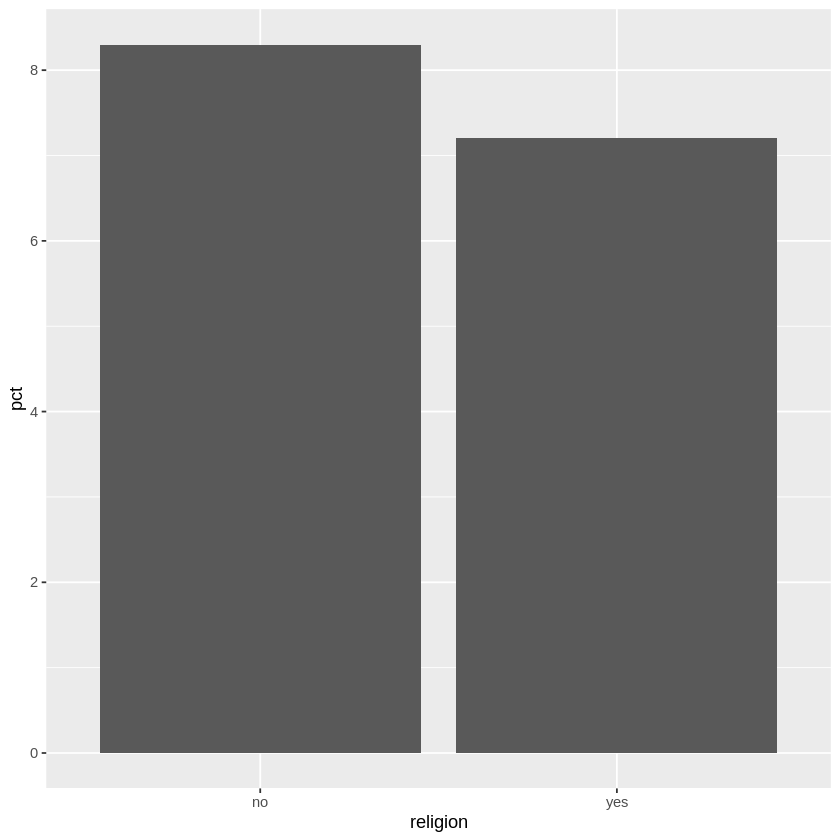

In [ ]:
ggplot(data = divorce, aes(x = religion, y = pct)) + geom_col()

* 출력된 표와 그래프를 보면 종교인의 이혼율은 7.2, 무교인의 이혼율은 8.3으로, 종교를 가지고 있는 사람의 이혼율이 더 높다는 것을 알 수 있다.
* 즉, 종교가 있는 사람들이 이혼을 덜한다고 볼 수 있다.

### 4) 연령대 및 종교 유무에 따른 이혼율 분석하기
#### (1) 연령대별 이혼율 표 만들기

In [ ]:
ageg_marriage <- welfare %>%
  filter(!is.na(group_marriage)) %>%
  group_by(ageg, group_marriage) %>%
  summarise(n = n()) %>%
  mutate(tot_group = sum(n),
pct = round(n/tot_group*100, 1))

ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `ageg` is not found.


In [ ]:
ageg_marriage

ERROR: Error in eval(expr, envir, enclos): object 'ageg_marriage' not found


* count() 활용

In [ ]:
ageg_marriage <- welfare %>% filter(!is.na(group_marriage)) %>% count(ageg, group_marriage) %>% group_by(ageg) %>%
mutate(pct = round(n/sum(n)*100, 1))

ERROR: [1m[33mError[39m in `count()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `ageg` is not found.


#### (2) 연령대별 이혼율 그래프 만들기
* 초년 제외, 이혼 추출

In [ ]:
ageg_divorce <- ageg_marriage %>%
filter(ageg != "young" & group_marriage == "divorce") %>% select(ageg, pct)

ERROR: Error in ageg_marriage %>% filter(ageg != "young" & group_marriage == : could not find function "%>%"


In [ ]:
ageg_divorce

ERROR: Error in eval(expr, envir, enclos): object 'ageg_divorce' not found


* 그래프 만들기

In [ ]:
ggplot(data = ageg_divorce, aes(x = ageg, y = pct)) + geom_col()

ERROR: Error in eval(expr, envir, enclos): object 'ageg_divorce' not found


#### (3) 연령대 및 종교 유무에 따른 이혼율 표 만들기
* 연령대, 종교유무, 결혼상태 별 비율표 만들기

In [ ]:
ageg_religion_marriage <- welfare %>%
  filter(!is.na(group_marriage) & ageg != "young") %>%
  group_by(ageg, religion, group_marriage) %>%
  summarise(n = n()) %>%
mutate(tot_group = sum(n),
pct = round(n/tot_group*100, 1))

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `!is.na(group_marriage) & ageg != "young"`.
[1mCaused by error:[22m
[33m![39m object 'ageg' not found


In [ ]:
ageg_religion_marriage

ERROR: Error in eval(expr, envir, enclos): object 'ageg_religion_marriage' not found


* count() 활용

In [ ]:
ageg_religion_marriage <- welfare %>%
  filter(!is.na(group_marriage) & ageg != "young") %>%
  count(ageg, religion, group_marriage) %>%
  group_by(ageg, religion) %>%
mutate(pct = round(n/sum(n)*100, 1))

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `!is.na(group_marriage) & ageg != "young"`.
[1mCaused by error:[22m
[33m![39m object 'ageg' not found


#### (4) 연령대 및 종교 유무별 이혼율 표 만들기

In [ ]:
df_divorce <- ageg_religion_marriage %>%
  filter(group_marriage == "divorce") %>%
  select(ageg, religion, pct)

ERROR: Error in eval(expr, envir, enclos): object 'ageg_religion_marriage' not found


In [ ]:
df_divorce

ERROR: Error in eval(expr, envir, enclos): object 'df_divorce' not found


### 4) 연령대 및 종교 유무에 따른 이혼율 그래프 만들기

In [ ]:
ggplot(data = df_divorce, aes(x =
   ageg, y = pct, fill = religion )) + geom_col(position = "dodge")

ERROR: Error in ggplot(data = df_divorce, aes(x = ageg, y = pct, fill = religion)): could not find function "ggplot"


### 결론
* 출력된 표와 그래프를 보면 종교인의 이혼율은 7.2, 무교인의 이혼율은 8.3으로, 종교를 가지고 있는 사람의 이혼율이 더 높다는 것을 알 수 있다.
* 즉, 종교가 있는 사람들이 이혼을 덜한다고 볼 수 있다.

* 출력된 표와 그래프를 보면 중년층에서는 무교인의 이혼율이 종교인의 이혼율보다 1.8%나 더 높다는 것을 알 수 있다.
* 그러나 노년층에서는 무교인의 이혼율과 종교인의 이혼율은 0.1% 차이로, 별 다른 차이를 보이지 않음을 알 수 있다.
* 나아가, 종교인의 이혼율이 오히려 더 높음을 알 수 있다.

## **9. 지역별 연령대 비율**
**[1단계] 문제 정의**
* 노년층이 많은 지역은 어디일까?
* 노년층의 빈도가 아닌 노년층 비율을 구해 노년층이 많은 지역에 대해 분석해보고자 했다.


### 1) 지역 변수 검토 및 전처리하기
#### (1) 변수 검토하기

In [ ]:
class(welfare$code_region)

[1] "numeric"

In [ ]:
table(welfare$code_region)


   1    2    3    4    5    6    7 
2486 3711 2785 2036 1467 1257 2922 

#### (2) 전처리
* 지역 코드 목록 만들기


In [ ]:
list_region <- data.frame(code_region = c(1:7), region = c("서울", "수도권(인천/경기)", "부산/경남/울산", "대구/경북",
"대전/충남", "강원/충북", "광주/전남/전북/제주도"))

In [ ]:
list_region

code_region,region
<int>,<chr>
1,서울
2,수도권(인천/경기)
3,부산/경남/울산
4,대구/경북
5,대전/충남
6,강원/충북
7,광주/전남/전북/제주도


* welfare에 지역명 변수 추가

In [ ]:
welfare <- left_join(welfare, list_region, id = "code_region")

ERROR: [1m[33mError[39m in `left_join()`:[22m
[1m[22m[33m![39m `...` must be empty.
[31m✖[39m Problematic argument:
[36m•[39m id = "code_region"


In [ ]:
welfare %>% select(code_region, region) %>% head

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `region` doesn't exist.


### 2) 지역별 연령대 비율 분석하기
#### (1) 지역별 연령대 비율표 만들기

In [ ]:
region_ageg <- welfare %>% group_by(region, ageg) %>% summarise(n = n()) %>% mutate(tot_group = sum(n),
pct = round(n/tot_group*100, 2))

ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
Column `region` is not found.
Column `ageg` is not found.


In [ ]:
head(region_ageg)

ERROR: Error in eval(expr, envir, enclos): object 'region_ageg' not found


* count 활용

In [ ]:
region_ageg <- welfare %>% count(region, ageg) %>% group_by(region) %>%
mutate(pct = round(n/sum(n)*100, 2))

ERROR: [1m[33mError[39m in `count()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
Column `region` is not found.
Column `ageg` is not found.


#### (2) 그래프 만들기

In [ ]:
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) + geom_col() +
coord_flip()

ERROR: Error in eval(expr, envir, enclos): object 'region_ageg' not found


#### (3) 막대 정렬하기 : 노년층 비율 높은 순
* 노년층 비율 내림차순 정렬

In [ ]:
list_order_old <- region_ageg %>% filter(ageg == "old") %>% arrange(pct)


ERROR: Error in eval(expr, envir, enclos): object 'region_ageg' not found


In [ ]:
list_order_old

ERROR: Error in eval(expr, envir, enclos): object 'list_order_old' not found


* 지역명 순서 변수 만들기

In [ ]:
order <- list_order_old$region
order

ERROR: Error in eval(expr, envir, enclos): object 'list_order_old' not found


In [ ]:
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) + geom_col() +
coord_flip() +
scale_x_discrete(limits = order)

ERROR: Error in eval(expr, envir, enclos): object 'region_ageg' not found


#### 4) 연령대 순으로 막대 색깔 나열하기

In [ ]:
class(region_ageg$ageg)

ERROR: Error in eval(expr, envir, enclos): object 'region_ageg' not found


In [ ]:
levels(region_ageg$ageg)

ERROR: Error in eval(expr, envir, enclos): object 'region_ageg' not found


In [ ]:
region_ageg$ageg <- factor(region_ageg$ageg,
level = c("old", "middle", "young"))
class(region_ageg$ageg)

ERROR: Error in eval(expr, envir, enclos): object 'region_ageg' not found


In [ ]:
levels(region_ageg$ageg)

ERROR: Error in eval(expr, envir, enclos): object 'region_ageg' not found


In [ ]:
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) + geom_col() +
coord_flip() +
scale_x_discrete(limits = order)

ERROR: Error in eval(expr, envir, enclos): object 'region_ageg' not found


### 결론
* 대구/경북의 노년층 비율은 45.6%로 가장 높다.
* 그 뒤로 강원/충북, 광주/전남/전북/제주도 순으로 높다는 것을 알 수 있다.
* 반대로 수도권의 경우, 노년층의 비율은 29.9%로 가장 낮다.

* 대구/경북의 고령화 관련 조사 결과, 동북지방통계청 관계자는 "경북은 고령화로 인해 사업·개인·공공서비스업 종사자가 감소하고 있다. 코로나 팬데믹때 방역 등 일자리를 얻었던 노인들이 실업했고, 아이가 많지 않아 학원,유치원 등이 줄어든 영향도 있다. 더욱이 올해는 농업 작황까지 좋지 않아 농림·어업 취업자 수도 2만2천명이나 줄었다"고 말했다.
* 막지 못할 고령화 사회라면 이제까지 노인이라고 치부하던 고령자들을 우리 사회의 필수 인력인 경제활동인구로 인식해야 할 것이며, 고령화 인력의 취업률을 제고해야 할 것이다.
또한, 1인 고령가구의 증가에 따라 독거노인들이 급속히 증가할 것으로, 80세 이상의 고령 1인가구를 보살피는 사회복지 정책의 강화도 필요하다.